# Understanding the dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#reading data from the csv file on Kaggle
#data= pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv")

#reading data from local csv
data=pd.read_csv("2019_nCoV_data.csv")
data.shape
data.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [2]:
data.drop("Sno", axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 6 columns):
Province/State    393 non-null object
Country           497 non-null object
Last Update       497 non-null object
Confirmed         497 non-null float64
Deaths            497 non-null float64
Recovered         497 non-null float64
dtypes: float64(3), object(3)
memory usage: 17.5+ KB


In [3]:
data.describe()

,Confirmed,Deaths,Recovered
count,497.000000,497.000000,497.000000
mean,93.410463,2.134809,1.839034
std,509.676135,18.107540,11.344773
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000
75%,43.000000,0.000000,0.000000
max,7153.000000,249.000000,169.000000


In [4]:
#checking for duplicate rows
duplicate_rows=data.duplicated(['Country','Province/State','Last Update'])
data[duplicate_rows]

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered


In [5]:
country_list=list(data['Country'].unique())
print(country_list)
print (len(country_list))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK']
31


In [6]:
#merging China and Mainland China
data.loc[data['Country']=='Mainland China','Country']='China'

In [7]:
dates=list(data['Last Update'].unique())
print(dates)
print (len(dates))

['1/22/2020 12:00', '1/23/20 12:00 PM', '1/24/2020 12:00 PM', '1/24/2020 4:00 PM', '1/25/2020 10:00 PM', '1/25/2020 12:00 PM', '1/26/2020 23:00', '1/27/2020 20:30', '1/28/2020 23:00', '1/28/2020 18:00', '1/29/2020 21:00', '1/30/2020 21:30', '1/31/2020 19:00']
13


In [8]:
data['Last Update'] = pd.to_datetime(data['Last Update'])
data['date_updated']=data['Last Update'].apply(lambda x:x.date())

In [9]:
#getting the total number of confirmed cases for each country
df_country=data.groupby(['Country']).max().reset_index(drop=None)
print(df_country[['Country','Confirmed','Deaths','Recovered']])

                 Country  Confirmed  Deaths  Recovered
0              Australia        4.0     0.0        2.0
1                 Brazil        0.0     0.0        0.0
2               Cambodia        1.0     0.0        0.0
3                 Canada        2.0     0.0        0.0
4                  China     7153.0   249.0      169.0
5                Finland        1.0     0.0        0.0
6                 France        6.0     0.0        0.0
7                Germany        7.0     0.0        0.0
8              Hong Kong       13.0     0.0        0.0
9                  India        1.0     0.0        0.0
10                 Italy        2.0     0.0        0.0
11           Ivory Coast        0.0     0.0        0.0
12                 Japan       17.0     0.0        1.0
13                 Macau        7.0     0.0        0.0
14              Malaysia        8.0     0.0        0.0
15                Mexico        0.0     0.0        0.0
16                 Nepal        1.0     0.0        0.0
17        

# Plotting the data

Text(0.5, 0, 'Dates')

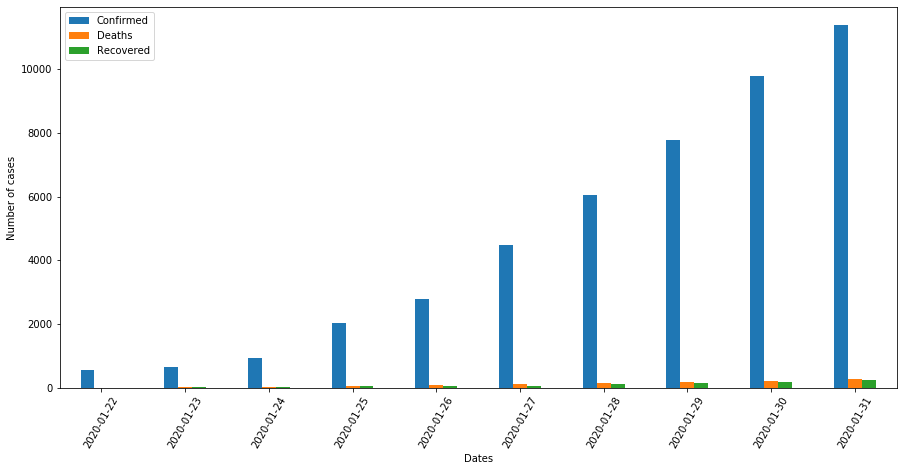

In [10]:
#setting the image size
plt.rcParams['figure.figsize']=(15,7)

#plotting the cases by date
data.groupby(['date_updated']).sum().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Number of cases')
plt.xlabel('Dates')

Text(0.5, 0, 'Dates')

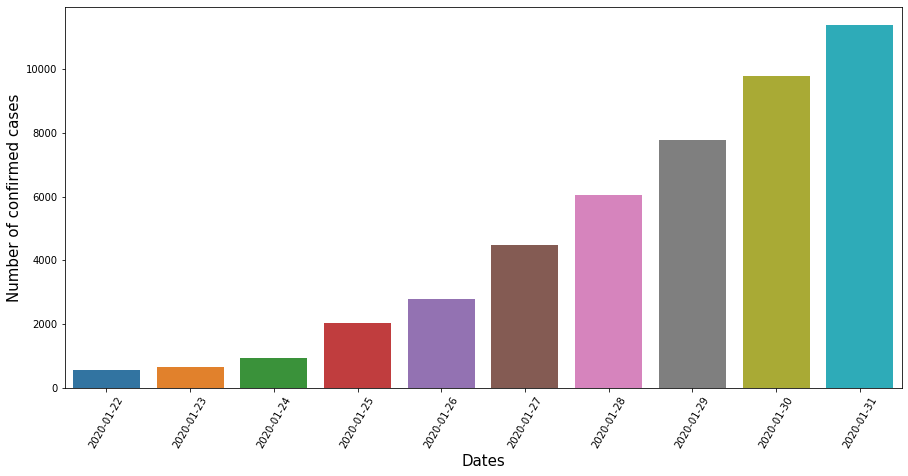

In [11]:
# no of confirmed cases by date

sns.axes_style("whitegrid")
sns.barplot(x="date_updated", y="Confirmed", data=data.groupby(['date_updated']).sum().reset_index(drop=None))
plt.xticks(rotation=60)
plt.ylabel('Number of confirmed cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)


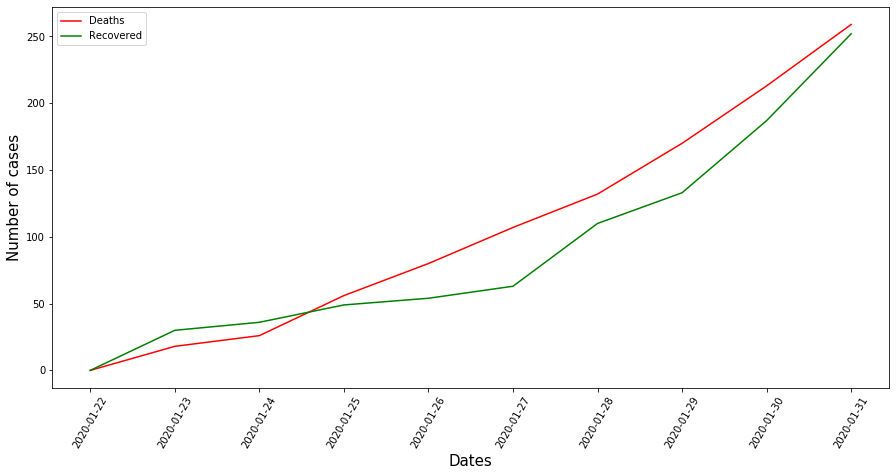

In [18]:
#plotting two line plots for deaths and recoveries respectively

plt.plot('date_updated', 'Deaths', data=data.groupby(['date_updated']).sum().reset_index(drop=None), color='red')
plt.plot('date_updated', 'Recovered', data=data.groupby(['date_updated']).sum().reset_index(drop=None), color='green')
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

Text(0.5, 0, 'Countries')

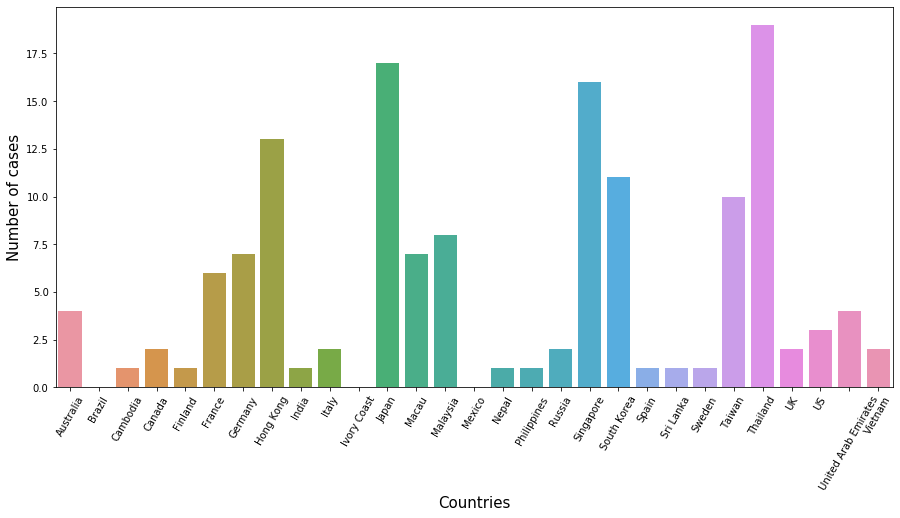

In [19]:
#We know that China is the most affected country by a large margin, 
#so lets create a bar plot to compare countries other than China

sns.barplot(x="Country", y="Confirmed", data=df_country[df_country.Country!='China'])
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Countries',fontsize=15)


Text(0.5, 0, 'Provinces')

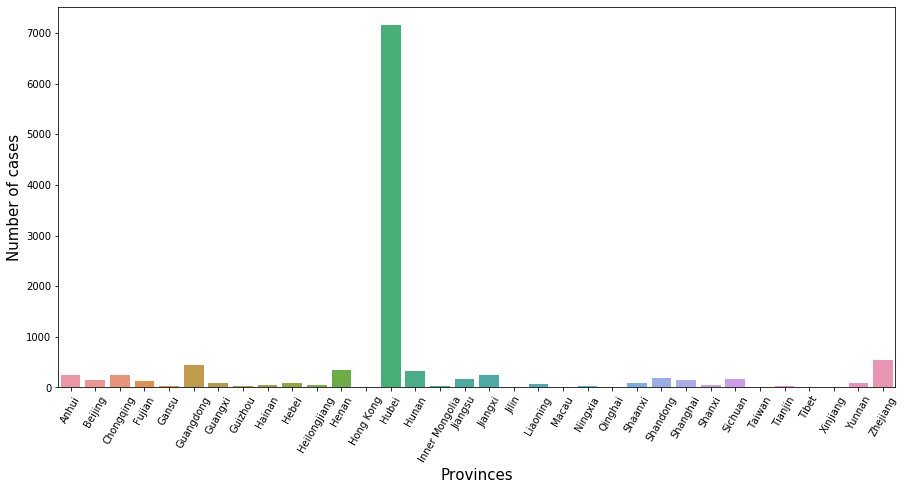

In [21]:
#creating a separate dataframe for provinces and making a bar plot

df_province=data[data['Country']=='China'].groupby(['Province/State']).max().reset_index(drop=None)
sns.barplot(x="Province/State", y="Confirmed", data=df_province,ci=None)
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Provinces',fontsize=15)


Text(0, 0.5, 'Number of cases')

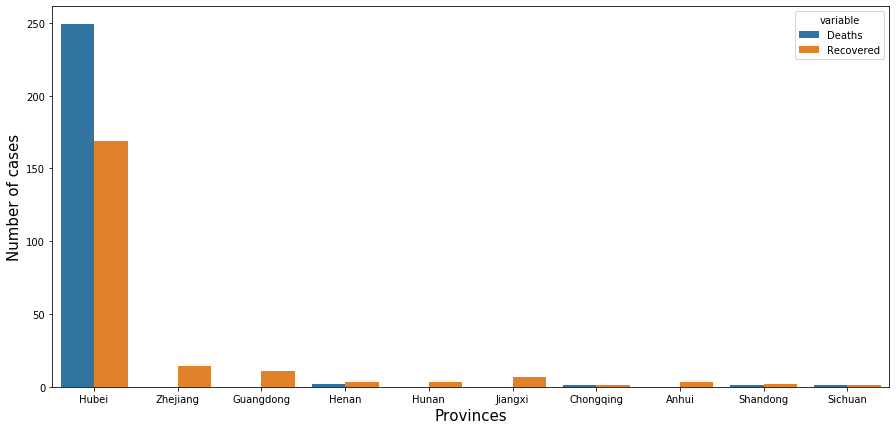

In [22]:
#selecting 10 most affected provinces
df_province=df_province.nlargest(10,'Confirmed')

df_province=df_province[['Province/State','Deaths','Recovered']]

#for multi-bar plots in seaborn, we need to melt the dataframe so #that the the deaths and recovered values are in the same column
df_province= df_province.melt(id_vars=['Province/State'])

sns.barplot(x='Province/State', y='value', hue='variable', data=df_province)
plt.xlabel('Provinces',fontsize=15)
plt.ylabel('Number of cases',fontsize=15)